# Обзор данных Sentinel

Thanks To [CropNet](https://github.com/fudong03/CropNet/)
and [Google Drive](https://drive.google.com/drive/folders/1Js98GAxf1LeAUTxP1JMZZIrKvyJStDgz)

***

## Срез данных
Все данные (2017-2022) всех штатов весят больше 1 тб. Поэтому отберем следующие:
- Данные за *2017-2022* годы.
- Данные по следующим культурам: *Кукуруза*.
- Данные для штатов: *IL, IA, IN, KY, MO, OH*.
***

## Описание
Снимки Sentinel-2, полученные в ходе [миссии Sentinel-2](https://sentinel.esa.int/web/sentinel/missions/sentinel-2), предоставляют спутниковые снимки высокого разрешения для мониторинга роста полевых культур в Соединенных Штатах Америки (USA). Снимки покрывают 2291 округов.
- Формат снимков: 224x224 RGB;
- пространственное разрешение (spatial resolution): 9x9 km;
- частота повторных снимков: 14 дней.

## Файлы данных
- Структура хранения файлов: `data/raw/Sentinel/<year>/<state abbreviation>/<file_name>`;
- формат названия файла: `Agriculture_<state FIPS>_<state abbreviation>_<year>-<start month>-<start day>_<year>-<end month>-<end day>.h5`;
- пример: `data/raw/Sentinel/2019/IA/Agriculture_19_IA_2019-01-01_2019-03-31.h5`;

## Формат данных
Формат файла: HDF5.

Файл имеет иерархическую структуру:

```plaintext
└── FIPS Code                               <- the FIPS code of the county being represented,
    |                                          e.g. "01001"
    └── date                                <- the revisit date for satellite images,
        |                                      e.g. "2022-01-01"
        ├── data                            <- a list of satellite images for one county
        |   |                                  gridded at 9x9 km
        |   ├── index: [0]                  <- the image data for the first grid,
        |   |                                  i.e., an image with 224x224x3 dimensions
        |   ├── index: [1]                  <- the image data for the second grid
        |   |
        |   └── etc.
        |
        ├── state                           <- the state name for the above satellite images,
        |   |                                  e.g., "ALABAMA"
        |   └── index: [0]                  <- the state name for all the grids
        |
        ├── county                          <- the county name for the above satellite images,
        |   |                                  e.g., "AUTAUGA"
        |   └── index: [0]                  <- the county name for all the grids
        |
        └── coordinates                     <- the coordinate information for girds
            |
            ├── index: [0]                  <- the coordinate information for the first grid
            |   |
            |   ├── lower left corner lat   <- (index: [0][0][0]) - the latitude of the 
            |   |                              lower left corner
            |   ├── lower left corner lon   <- (index: [0][0][1]) - the longitude of the
            |   |                              lower left corner
            |   ├── upper right corner lat  <- (index: [0][1][0]) - the latitude of the
            |   |                              upper right corner
            |   └── upper right corner lon  <- (index: [0][1][1]) - the longitude of the
            |                                  upper right corner
            └── etc.
```

***

In [1]:
import numpy as np
import pandas as pd
import h5py
from pathlib import Path

In [2]:
PATH_DATA = Path("../data")
PATH_DATA_SENTINEL = PATH_DATA / "raw/Sentinel/2019/"

In [3]:
with h5py.File(
    PATH_DATA_SENTINEL / "IA/Agriculture_19_IA_2019-01-01_2019-03-31.h5", "r"
) as f:
    print("level-0. FIPS Codes:\n", f.keys(), "\n")

    print("Идем внутрь по первому fips:")
    fips = list(f.keys())[0]
    level1_keys = f[fips].keys()
    print("level-1. Dates:\n", level1_keys, "\n")

    level1_keys = list(level1_keys)
    date_ = level1_keys[0]
    level2_keys = f[fips][date_].keys()
    print("level-2. Attributes:\n", level2_keys, "\n")

    print("Дальше идут классы Dataset. Похожи на numpy array")
    for attr in level2_keys:
        print(f"level-3. {attr}:\n", f[fips][date_][attr], "\n")

level-0. FIPS Codes:
 <KeysViewHDF5 ['19001', '19003', '19005', '19007', '19009', '19011', '19013', '19015', '19017', '19019', '19021', '19023', '19025', '19027', '19029', '19031', '19033', '19035', '19037', '19039', '19041', '19043', '19045', '19047', '19049', '19051', '19053', '19055', '19057', '19059', '19061', '19063', '19065', '19067', '19069', '19071', '19073', '19075', '19077', '19079', '19081', '19083', '19085', '19087', '19089', '19091', '19093', '19095', '19097', '19099', '19101', '19103', '19105', '19107', '19109', '19111', '19113', '19115', '19117', '19119', '19121', '19123', '19125', '19127', '19129', '19131', '19133', '19135', '19137', '19139', '19141', '19143', '19145', '19147', '19149', '19151', '19153', '19155', '19157', '19159', '19161', '19163', '19165', '19167', '19169', '19171', '19173', '19175', '19177', '19179', '19181', '19183', '19185', '19187', '19189', '19191', '19193', '19195', '19197']> 

Идем внутрь по первому fips:
level-1. Dates:
 <KeysViewHDF5 ['2019-01

`county` и `state`

Судя по тому, что эти два ключа в единственных числах (не `counties` и не `states`), значений в этих Dataset-ах будет в количестве 1 штука

In [4]:
with h5py.File(
    PATH_DATA_SENTINEL / "IA/Agriculture_19_IA_2019-01-01_2019-03-31.h5", "r"
) as f:
    print("state:", f[fips][date_]["state"][:])
    print("county:", f[fips][date_]["county"][:])

state: [b'IOWA']
county: [b'ADAIR']


`coordinates`

Структура
```plaintext

[
    [
        [lower left corner lat, lower left corner lon],
        [upper right corner lat, upper right corner lon]
    ],
    ...
]
```

In [5]:
with h5py.File(
    PATH_DATA_SENTINEL / "IA/Agriculture_19_IA_2019-01-01_2019-03-31.h5", "r"
) as f:
    print("coordinates:\n", f[fips][date_]["coordinates"][:2])

coordinates:
 [[[ 41.38847667 -94.700629  ]
  [ 41.504148   -94.58587   ]]

 [[ 41.38847667 -94.58587   ]
  [ 41.504148   -94.471111  ]]]


`data`

Изображения. Нарисуем, учитывая координаты.

In [6]:
import matplotlib.pyplot as plt


def plot_geogrid(images, coordinates):
    ll_coords = coordinates[:, 0, :]  # Lower-left corners (lat, lon)
    ur_coords = coordinates[:, 1, :]  # Upper-right corners (lat, lon)

    unique_lats = np.sort(np.unique(ll_coords[:, 0]))[::-1]  # большие сверху
    unique_lons = np.sort(np.unique(ll_coords[:, 1]))

    # Create a grid layout (rows go from high latitude to low, columns from low to high longitude)
    n_rows = len(unique_lats)
    n_cols = len(unique_lons)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 15))

    # Fill the grid with images
    for img_idx in range(len(images)):
        ll_lat, ll_lon = ll_coords[img_idx]
        ur_lat, ur_lon = ur_coords[img_idx]

        # Ищем строку и колонку, где должно стоять изображение
        row = np.where(unique_lats == ll_lat)[0][0]
        col = np.where(unique_lons == ll_lon)[0][0]

        ax = axes[row, col]
        ax.imshow(images[img_idx])
        ax.set_title(
            f"Img {img_idx}\n[({ll_lat:.2f}, {ll_lon:.2f}), ({ur_lat:.2f}, {ur_lon:.2f})]"
        )
        ax.axis("off")

    plt.tight_layout()
    plt.show()

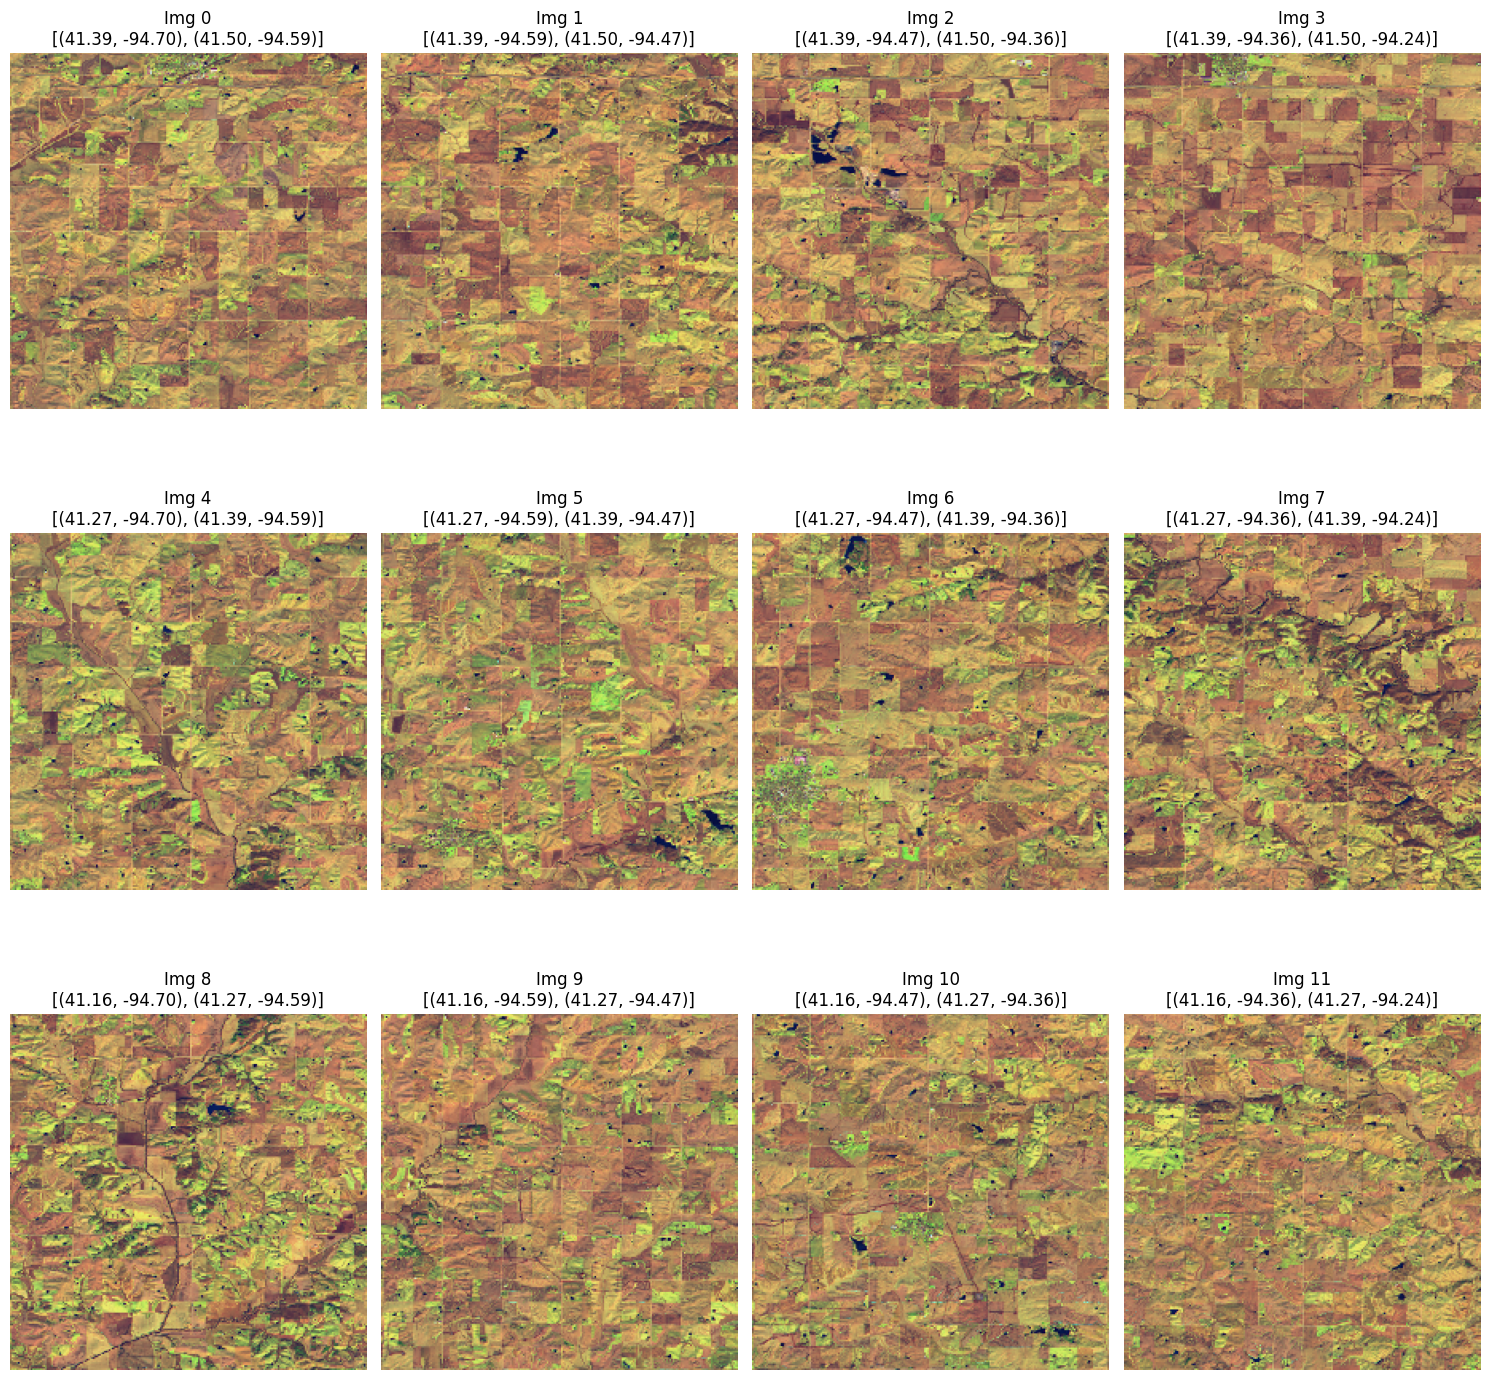

In [7]:
with h5py.File(
    PATH_DATA_SENTINEL / "IA/Agriculture_19_IA_2019-01-01_2019-03-31.h5", "r"
) as f:
    images = f[fips][date_]["data"][:]
    coordinates = f[fips][date_]["coordinates"][:]

    plot_geogrid(images, coordinates)

***

## Карта покрытия снимками США

In [8]:
"""
    Каждый файл охватывает некоторую квадратную площадь.
    Пройдемся по координатам картинок за одну дату для каждого fisp
    и найдем крайние нижнии левые точки и крайние правые верхние точки.
"""
coord_cols = [
    "lower_left_lat",
    "lower_left_lon",
    "upper_right_lat",
    "upper_right_lon",
]
features = []
# fips
index = []
# Проходимся по директориям штатов
for state_dir in PATH_DATA_SENTINEL.iterdir():
    # Достаточно по одному файлу из директории,
    # т.к. остальные - повторные того же штата
    with h5py.File(next(state_dir.iterdir()), "r") as h5file:
        for fips, item in h5file.items():
            index.append(fips)
            first_date = next(iter(item))
            attrs = item[first_date]
            coordinates = attrs["coordinates"]
            # Находим общий bounding box для всех изображений
            # Левый нижний угол - минимальные lat и lon среди всех левых нижних углов
            lower_left_lat = np.min(coordinates[:, 0, 0])
            lower_left_lon = np.min(coordinates[:, 0, 1])

            # Правый верхний угол - максимальные lat и lon среди всех правых верхних углов
            upper_right_lat = np.max(coordinates[:, 1, 0])
            upper_right_lon = np.max(coordinates[:, 1, 1])

            # Добавляем найденные координаты
            features.append(
                [
                    lower_left_lat,
                    lower_left_lon,
                    upper_right_lat,
                    upper_right_lon,
                ]
            )
polygons = pd.DataFrame(data=features, index=index, columns=coord_cols)

# Сверим с изображением свыше и убедимся, что код правильный
polygons.loc["19001"]

lower_left_lat     41.157134
lower_left_lon    -94.700629
upper_right_lat    41.504148
upper_right_lon   -94.241593
Name: 19001, dtype: float64

In [9]:
print(polygons[["lower_left_lon", "lower_left_lat"]].min(axis=0))
print(polygons[["upper_right_lon", "upper_right_lat"]].max(axis=0))

lower_left_lon   -96.639704
lower_left_lat    35.995812
dtype: float64
upper_right_lon   -80.518693
upper_right_lat    43.500945
dtype: float64


In [10]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import box


def plot_map_polygons(polygons: pd.DataFrame, title: str):
    # Загрузим шейпфайлы для штатов и округов
    # https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.html
    states = gpd.read_file(
        "../resources/USA-map/cb_2018_us_state_500k/cb_2018_us_state_500k.shp"
    )
    counties = gpd.read_file(
        "../resources/USA-map/cb_2018_us_county_500k/cb_2018_us_county_500k.shp"
    )

    # Фильтруем только континентальные штаты (исключаем Аляску, Гавайи, Пуэрто-Рико)
    exclude_states = ["02", "15", "72", "60", "66", "69", "78"]
    states = states[~states["STATEFP"].isin(exclude_states)]
    counties = counties[~counties["STATEFP"].isin(exclude_states)]

    # Создаем GeoDataFrame с прямоугольниками из polygons
    rectangles = []
    for idx, row in polygons.iterrows():
        rect = box(
            row["lower_left_lon"],
            row["lower_left_lat"],
            row["upper_right_lon"],
            row["upper_right_lat"],
        )
        rectangles.append(rect)

    rectangles_gdf = gpd.GeoDataFrame(geometry=rectangles, crs="EPSG:4326")

    # Строим карту
    fig, ax = plt.subplots(figsize=(16, 10))

    # Рисуем штаты и округа
    states.plot(ax=ax, edgecolor="black", facecolor="lightgray", linewidth=0.8)
    counties.plot(ax=ax, edgecolor="gray", facecolor="none", linewidth=0.2)

    # Добавляем подписи — аббревиатуры штатов
    for idx, row in states.iterrows():
        x, y = row.geometry.centroid.coords[0]
        ax.text(
            x,
            y,
            row["STUSPS"],
            fontsize=8,
            ha="center",
            va="center",
            weight="bold",
            color="black",
        )

    # Рисуем прямоугольники покрытия
    rectangles_gdf.plot(
        ax=ax, edgecolor="darkgreen", facecolor="limegreen", alpha=0.5
    )

    # Настройки осей и заголовок
    ax.set_xlim([-125, -66])
    ax.set_ylim([24, 50])
    ax.set_title(title, fontsize=16)
    ax.set_xlabel("Долгота")
    ax.set_ylabel("Широта")

    plt.tight_layout()
    plt.show()


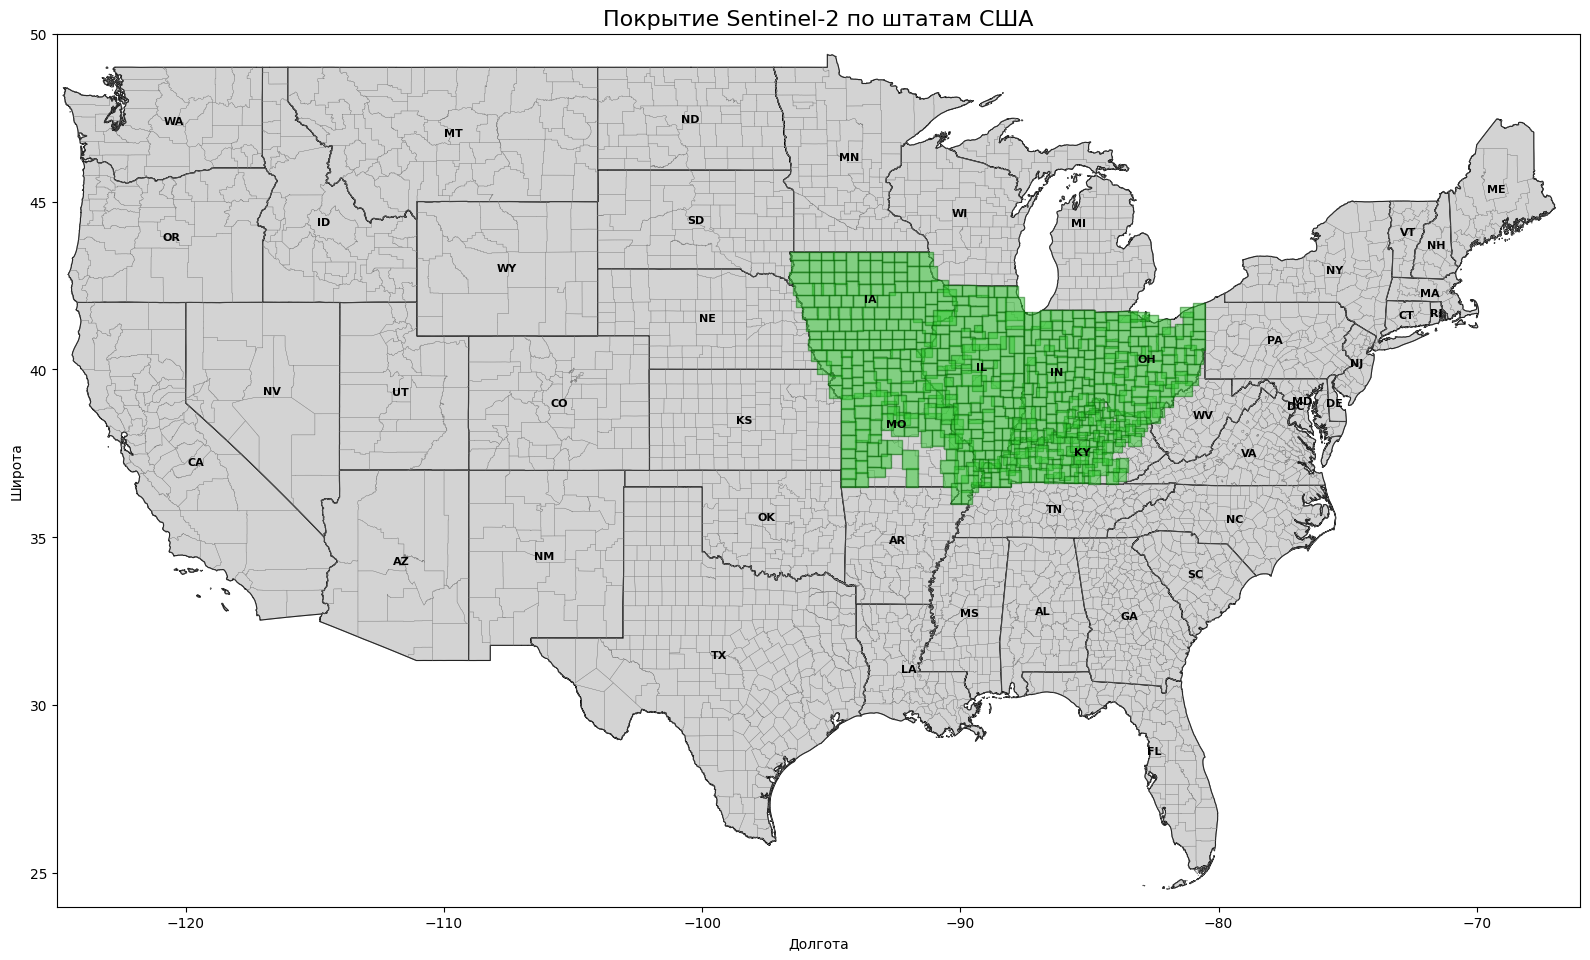

In [11]:
plot_map_polygons(polygons, "Покрытие Sentinel-2 по штатам США")